<a href="https://colab.research.google.com/github/SrAyush31/Recommendation-Engine/blob/master/Collaborative_filtering_with_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==1.0.50 --quiet

     |████████████████████████████████| 210 kB 8.8 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 


In [2]:
import pandas as pd
from fastai.collab import CollabDataBunch, collab_learner

In [3]:
!unzip -q /content/ml-latest-small.zip

In [9]:
pd.read_csv('/content/ml-latest-small/movies.csv')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [11]:
ratings_df = pd.read_csv('/content/ml-latest-small/ratings.csv')
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [12]:
data = CollabDataBunch.from_df(ratings_df, valid_pct=0.1)
data.show_batch()

userId,movieId,target
414,3053,4.0
177,69757,3.5
607,1580,3.0
226,1222,5.0
377,1942,4.5


We can use the collab_learner method from fastai to create a neural collaborative filtering model.




In [13]:
learn = collab_learner(data, n_factors=40, y_range=[0,5.5], wd=.1)

The learner uses the mean squared error loss function to evaluate the predictions of the model, and the Adam optimizer to adjust the parameters (vectors and biases) using gradient descent. Before we train the model, we use the learning rate finder to select a good learning for the optimizer.

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


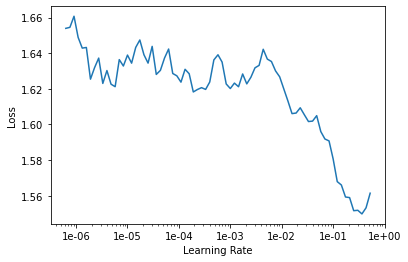

In [14]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [15]:
learn.fit_one_cycle(5, 0.01)

epoch,train_loss,valid_loss,time
0,0.774772,0.802908,00:12
1,0.761525,0.759364,00:14
2,0.631497,0.731689,00:14
3,0.465523,0.709545,00:13
4,0.309051,0.712527,00:12


In [16]:
(users, items), ratings = next(iter(data.valid_dl))
preds = learn.model(users, items)
print('Real\tPred\tDifference')
for p in list(zip(ratings, preds))[:16]:
    print('{}\t{:.1f}\t{:.1f}'.format(p[0],p[1],p[1]-p[0]))

Real	Pred	Difference
3.0	3.8	0.8
4.0	3.7	-0.3
3.0	3.2	0.2
5.0	4.6	-0.4
3.0	2.9	-0.1
4.0	3.6	-0.4
3.0	3.9	0.9
2.0	1.9	-0.1
1.0	3.4	2.4
4.0	4.1	0.1
5.0	4.3	-0.7
4.5	3.9	-0.6
3.5	2.8	-0.7
3.5	2.5	-1.0
2.0	2.4	0.4
5.0	4.2	-0.8
